Using array-based list to implement stack and queue ADT has some desirable qualities:

1. The access time to any element in a list is $O(1)$.
2. The amortised time complexity for appending an element to the list is $O(1)$.
3. Little memory overhead.

However, there are also some undesirable properties:

1. The length of the underlying list may be larger than the actual number of stored elements.
2. The resizing operation may cause noticible delay in real-time systems.
3. Adding and removing one element in the middle of a list are expensive.

Hence the need for using linked list arises.

([For more references go here](https://github.com/fastzhong/mth251/blob/main/public/notebooks/lab3.ipynb))

#### Time complexity

| Operation | Singly Linked List | Dynamic Array (`list`) |
| -- | -- | -- |
| Accessing | $O(n)$ | $O(1)$ |
| Searching | $O(n)$ | $O(n)$ |
| Inserting | $O(1)$ (only at head else $O(n)$) | $O(n)$ |
| Deleting | $O(1)$ (only at head else $O(n)$) | $O(n)$ |

### Singly Linked List (SLL)

Below are an example of the operations:

| Initial | Insertion at head | Insertion at tail | Deletion at head |
| -- | -- | -- | -- |
| 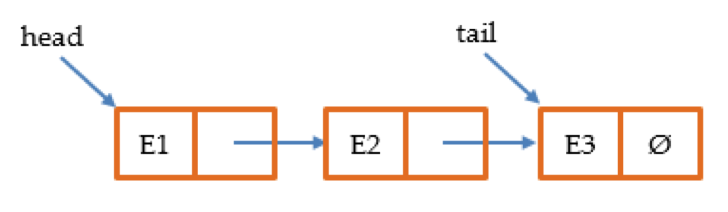 | 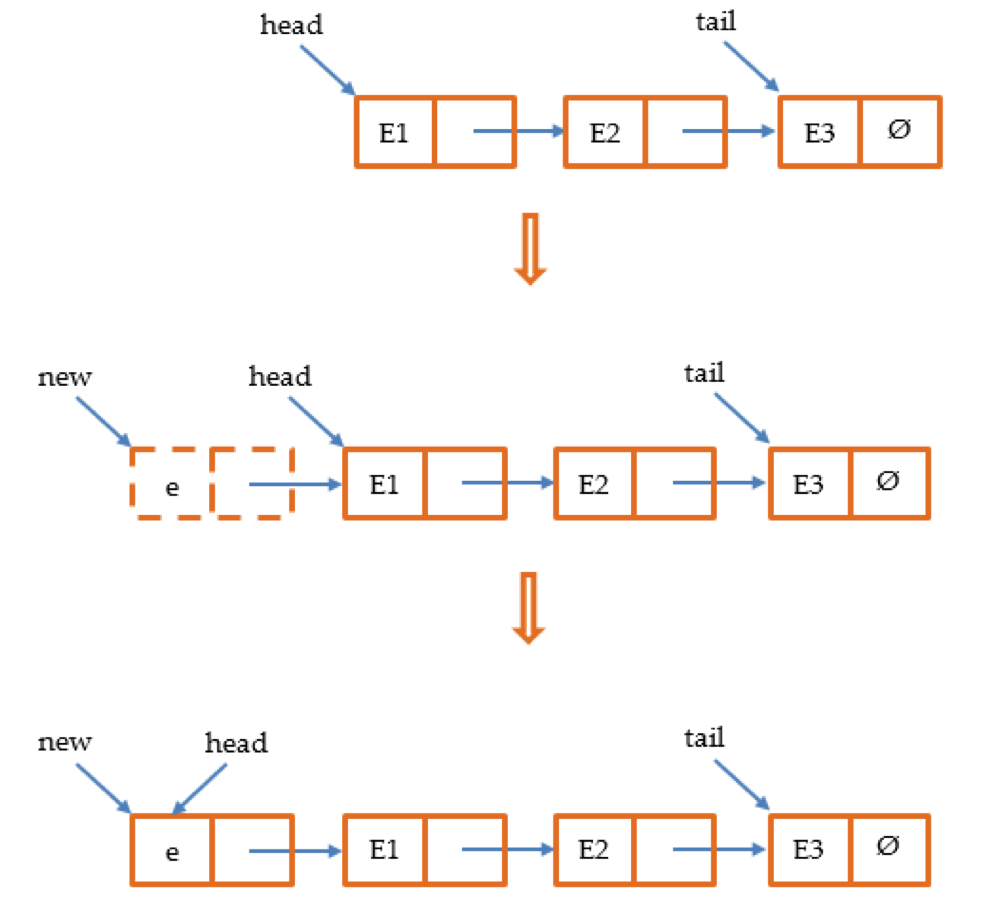 | 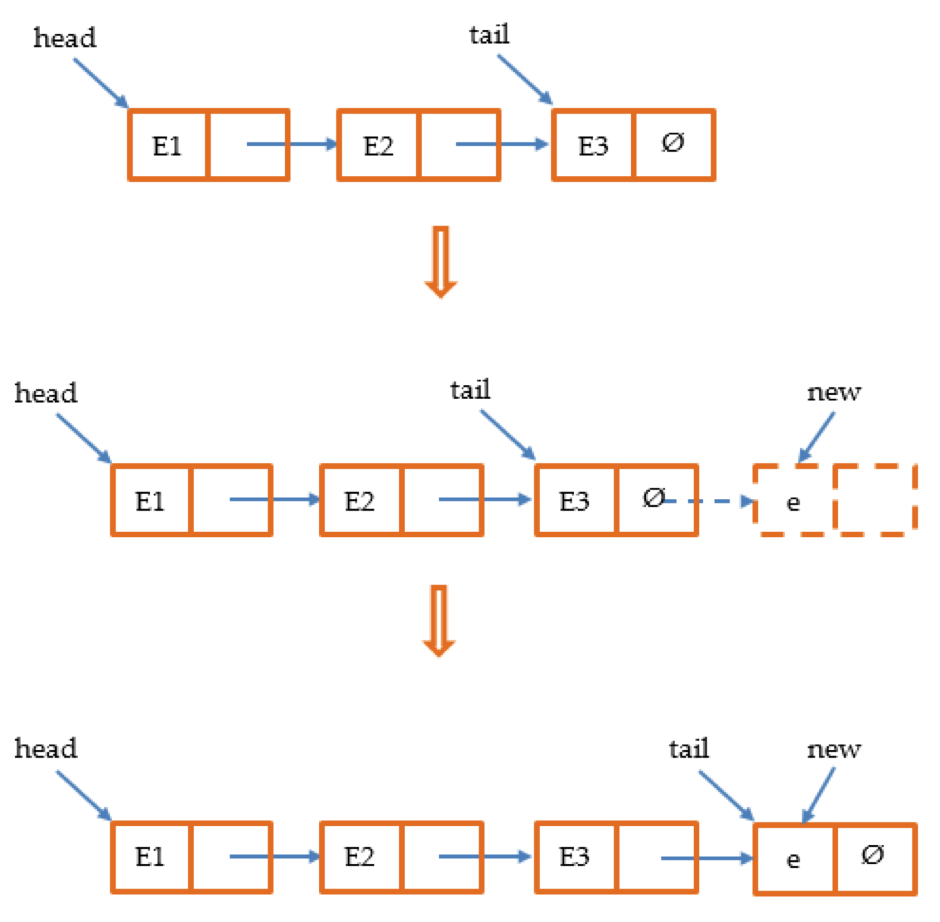 | 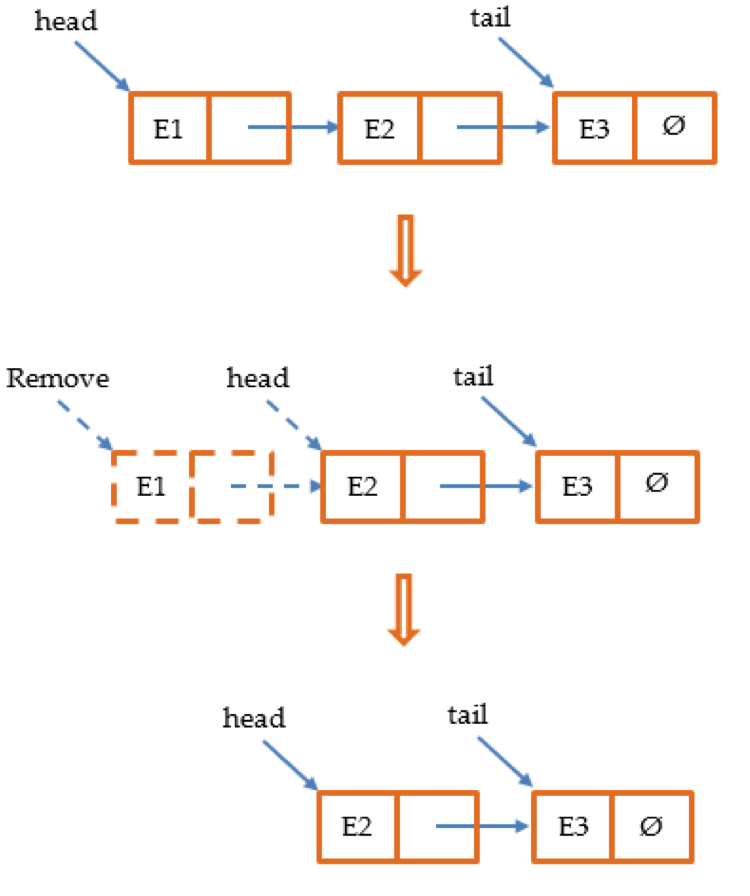 |


In [139]:
class Node: 
    
    def __init__(self, element=None, nxt=None): 
        self.element = element 
        self.next = nxt
        
    def as_str(self):
        return f"{{{self.element}»{self.next and self.next.element}}}"

class SinglyLinkedList:

    def __init__(self): 
        self.head = None
        self.tail = None
        self.size = 0
        
    def __iter__(self):
        cur = self.head
        
        while cur:
            yield cur
            cur = cur.next
    
    def __len__(self):
        return self.size
    
    def __repr__(self):
        return "[ " + " → ".join([node.as_str() for node in self]) + f" ] ({self.size})"

    def _search_index(self, pos):
        pre = None
        cur = self.head
        i = 0

        while i < pos:
            pre = cur
            cur = cur.next
            i += 1
            
        return pre, cur

    def insert_head(self, element):
        self.head = Node(element, self.head)
        
        if not self.tail:
            self.tail = self.head

        self.size += 1
        return True
            
    def insert_tail(self, element):
        node = Node(element)

        if self.tail:
            self.tail.next = node
        
        self.tail = node

        if not self.head:
            self.head = self.tail

        self.size += 1
        return True
    
    def insert_at(self, pos=0, element=None):
        if pos == 0:
            return self.insert_head(element)
        
        if pos < 0:
            pos = self.size + pos

        if pos < 0 or pos > self.size - 1:
            return False
        
        elif pos == self.size - 1:
            return self.insert_tail(element)
        
        pre, cur = self._search_index(pos)

        if not cur:
            return False

        pre.next = Node(element, cur)
        self.size += 1 
        return True
    
    def remove_head(self):
        if self.size == 0:
            return False
        
        elif self.size == 1:
            self.head = None
            self.tail = None
        
        else:
            self.head = self.head.next

        self.size -= 1
        return True
        
    def remove_at(self, pos=0):
        if pos == 0:
            return self.remove_head()

        if pos < 0:
            pos = self.size + pos

        if pos < 0 or pos > self.size - 1:
            return False

        pre, cur = self._search_index(pos)

        if not cur:
            return False

        pre.next = cur.next
        self.size -= 1 
        return True
    

ll = SinglyLinkedList()

print("Insert 1 | ", ll.insert_head(1), "\n", ll)
print("Insert 10 | ", ll.insert_tail(10), "\n", ll)
print("Insert 2 | ", ll.insert_head(2), "\n", ll)
print("Insert 3 | ", ll.insert_head(3), "\n", ll)
print("Insert 4 | ", ll.insert_head(4), "\n", ll)
print("Insert -20 | ", ll.insert_tail(-20), "\n", ll)
print("Insert@2 5 | ", ll.insert_at(2, 5), "\n", ll)
print("Insert@0 9 | ", ll.insert_at(0, 9), "\n", ll)
print("Insert@-3 300 | ", ll.insert_at(-3, 300), "\n", ll)
print("Insert@-1 -500 | ", ll.insert_at(-1, -500), "\n", ll)
print("Remove head | ", ll.remove_head(), "\n", ll)
print("Remove@0 | ", ll.remove_at(0), "\n", ll)
print("Remove@3 | ", ll.remove_at(3), "\n", ll)
print("Remove@-2 | ", ll.remove_at(-2), "\n", ll)
print("Remove@-1 | ", ll.remove_at(-1), "\n", ll)

Insert 1 |  True 
 [ {1»None} ] (1)
Insert 10 |  True 
 [ {1»10} → {10»None} ] (2)
Insert 2 |  True 
 [ {2»1} → {1»10} → {10»None} ] (3)
Insert 3 |  True 
 [ {3»2} → {2»1} → {1»10} → {10»None} ] (4)
Insert 4 |  True 
 [ {4»3} → {3»2} → {2»1} → {1»10} → {10»None} ] (5)
Insert -20 |  True 
 [ {4»3} → {3»2} → {2»1} → {1»10} → {10»-20} → {-20»None} ] (6)
Insert@2 5 |  True 
 [ {4»3} → {3»5} → {5»2} → {2»1} → {1»10} → {10»-20} → {-20»None} ] (7)
Insert@0 9 |  True 
 [ {9»4} → {4»3} → {3»5} → {5»2} → {2»1} → {1»10} → {10»-20} → {-20»None} ] (8)
Insert@-3 300 |  True 
 [ {9»4} → {4»3} → {3»5} → {5»2} → {2»300} → {300»1} → {1»10} → {10»-20} → {-20»None} ] (9)
Insert@-1 -500 |  True 
 [ {9»4} → {4»3} → {3»5} → {5»2} → {2»300} → {300»1} → {1»10} → {10»-20} → {-20»-500} → {-500»None} ] (10)
Remove head |  True 
 [ {4»3} → {3»5} → {5»2} → {2»300} → {300»1} → {1»10} → {10»-20} → {-20»-500} → {-500»None} ] (9)
Remove@0 |  True 
 [ {3»5} → {5»2} → {2»300} → {300»1} → {1»10} → {10»-20} → {-20»-500} → 

### Circularly Linked List (CLL)

Below are an example of the operations:

| Initial | After insertion of element | (Example usage) | 
| -- | -- | -- |
| 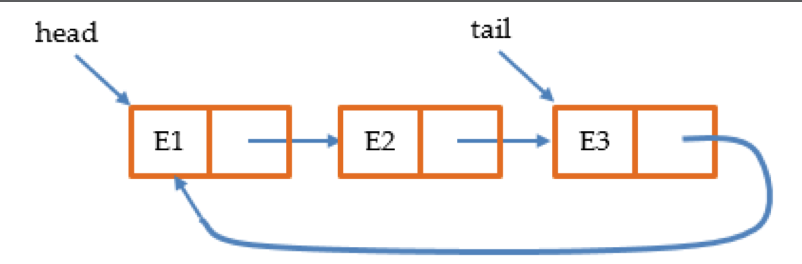 | 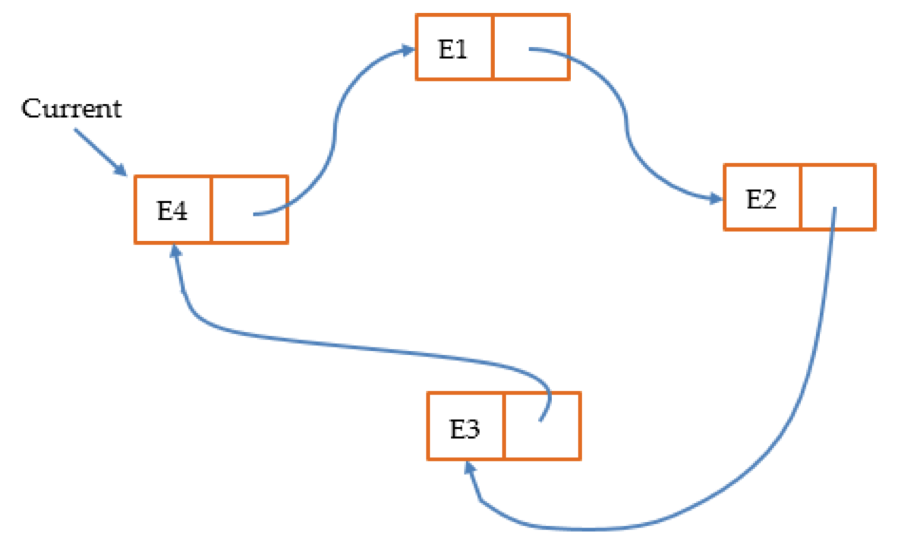 | 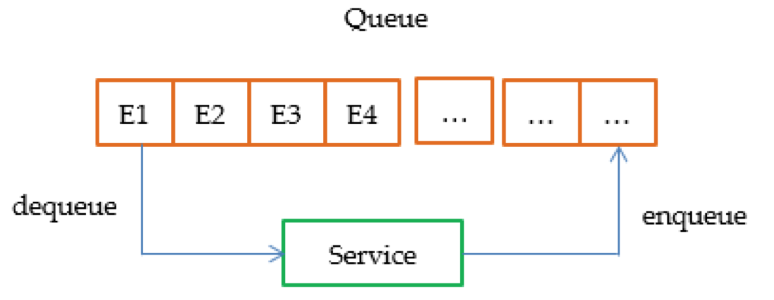 |

One good example application of the circularly linked list is a round-robin scheduler, where each node gets the service one by one. In each round, the first element in the queue is dequeued, served, and then enqueued as the last element in the queue. The dequeue and enqueue operations are repeated for many rounds so that each element is served one by one.

In [143]:
class Node: 
    
    def __init__(self, element=None, nxt=None): 
        self.element = element 
        self.next = nxt
        
    def as_str(self):
        return f"{{{self.element}»{self.next and self.next.element}}}"

class CircularLinkedList:
    
    def __init__(self):
        self.tail = None
        self.size = 0

    def __iter__(self):
        yield self.tail
        cur = self.tail.next
        
        while cur != self.tail:
            yield cur
            cur = cur.next
    
    def __len__(self):
        return self.size
    
    def __repr__(self):
        return "[ " + " → ".join([node.as_str() for node in self]) + f" ] ({self.size})"

    def insert(self, element):
        node = Node(element)

        if self.tail is None:
            node.next = node
    
        else:
            node.next = self.tail.next
            self.tail.next = node

        self.tail = node
        self.size += 1
        return True

    def remove(self, element):
        if self.size == 0:
            return False

        prev = self.tail
        cur = prev.next

        while cur != self.tail:
            if cur.element == element:
                prev.next = cur.next
                break

            prev = cur
            cur = cur.next
       
        if cur == self.tail and cur.element == element:
            if self.size == 1:
                self.tail = None
            else:            
                self.tail = prev
                prev.next = cur.next

        self.size -= 1

ll = CircularLinkedList() 
print("Insert 1 | ", ll.insert(1), "\n", ll)
print("Insert 10 | ", ll.insert(10), "\n", ll)
print("Insert 2 | ", ll.insert(2), "\n", ll)
print("Insert 3 | ", ll.insert(3), "\n", ll)
print("Insert 4 | ", ll.insert(4), "\n", ll)
print("Insert -20 | ", ll.insert(-20), "\n", ll)
print("Remove 3 | ", ll.remove(3), "\n", ll)
print("Remove 4 | ", ll.remove(4), "\n", ll)
print("Remove -20 | ", ll.remove(-20), "\n", ll)
print("Remove 10 | ", ll.remove(10), "\n", ll)

Insert 1 |  True 
 [ {1»1} ] (1)
Insert 10 |  True 
 [ {10»1} → {1»10} ] (2)
Insert 2 |  True 
 [ {2»1} → {1»10} → {10»2} ] (3)
Insert 3 |  True 
 [ {3»1} → {1»10} → {10»2} → {2»3} ] (4)
Insert 4 |  True 
 [ {4»1} → {1»10} → {10»2} → {2»3} → {3»4} ] (5)
Insert -20 |  True 
 [ {-20»1} → {1»10} → {10»2} → {2»3} → {3»4} → {4»-20} ] (6)
Remove 3 |  None 
 [ {-20»1} → {1»10} → {10»2} → {2»4} → {4»-20} ] (5)
Remove 4 |  None 
 [ {-20»1} → {1»10} → {10»2} → {2»-20} ] (4)
Remove -20 |  None 
 [ {2»1} → {1»10} → {10»2} ] (3)
Remove 10 |  None 
 [ {2»1} → {1»2} ] (2)


### Doubly Linked List (DLL)

Below are an example of the operations:

| Initial | Insertion at head | Insertion at tail | Removal at head | Removal at tail | 
| -- | -- | -- | -- | -- |
| 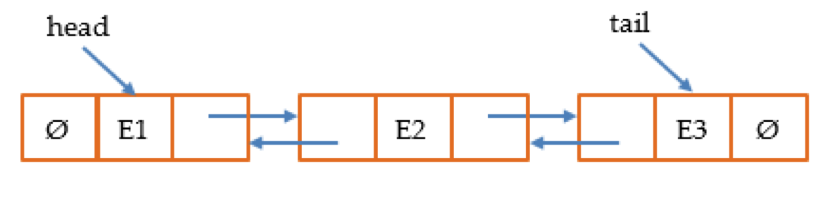 | 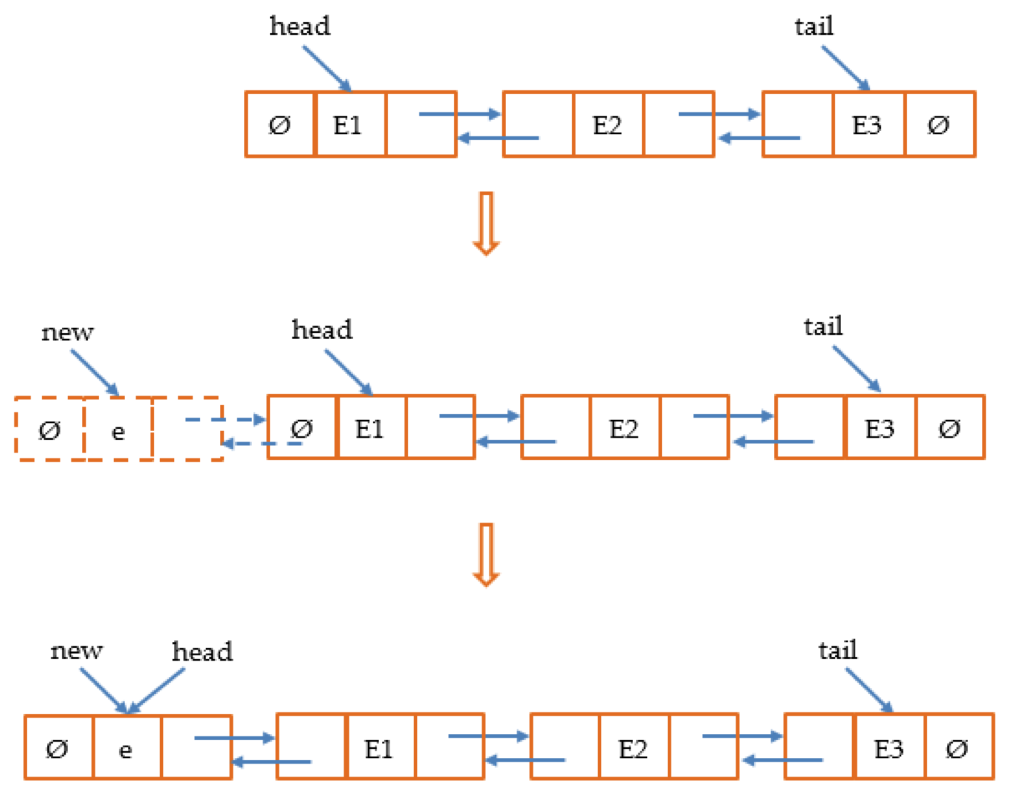 | 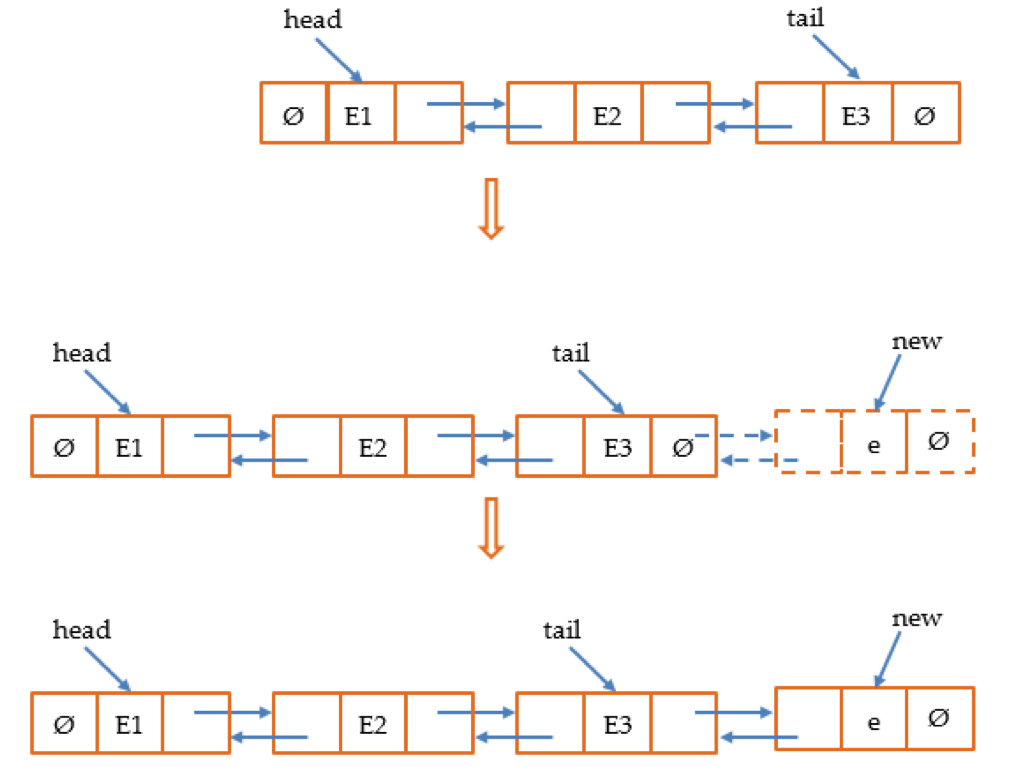 | 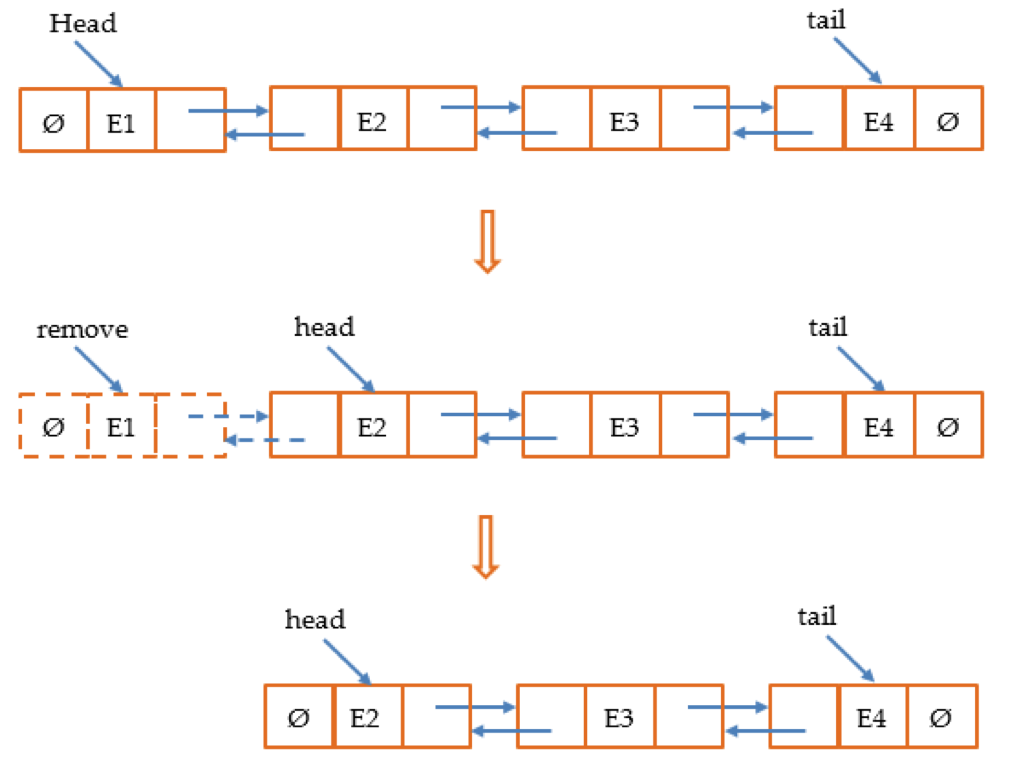 | 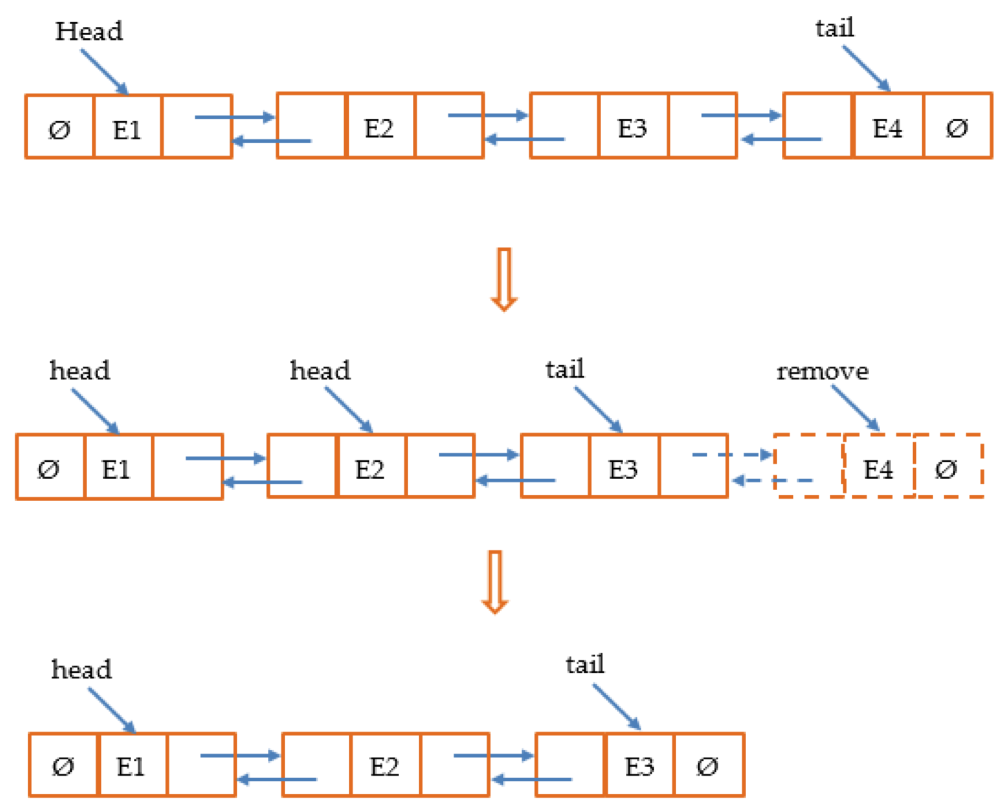 |

In [144]:
class Node: 
    
    def __init__(self, element=None, prev=None, nxt=None): 
        self.element = element 
        self.prev = prev
        self.next = nxt

    def as_str(self):
        return f"{{{self.prev and self.prev.element}«{self.element}»{self.next and self.next.element}}}"

class DoublyLinkedList:

    def __init__(self): 
        self.head = None
        self.tail = None
        self.size = 0
        
    def __iter__(self):
        cur = self.head
        
        while cur:
            yield cur
            cur = cur.next
    
    def __len__(self):
        return self.size
    
    def __repr__(self):
        return "[ " + " → ".join([node.as_str() for node in self]) + f" ] ({self.size})"

    def _search_index(self, pos):
        pre = None
        cur = self.head
        i = 0

        while i < pos:
            pre = cur
            cur = cur.next
            i += 1
            
        return pre, cur

    def insert_head(self, element):
        node = Node(element, nxt=self.head)
        
        if self.head:
            self.head.prev = node

        self.head = node
    
        if not self.tail:
            self.tail = self.head

        self.size += 1
        return True
            
    def insert_tail(self, element):
        node = Node(element, prev=self.tail)

        if self.tail:
            self.tail.next = node
        
        self.tail = node

        if not self.head:
            self.head = self.tail

        self.size += 1
        return True
    
    def insert_at(self, pos=0, element=None):
        if pos == 0:
            return self.insert_head(element)
        
        if pos < 0:
            pos = self.size + pos

        if pos < 0 or pos > self.size - 1:
            return False
        
        elif pos == self.size - 1:
            return self.insert_tail(element)
        
        pre, cur = self._search_index(pos)

        if not cur:
            return False

        node = Node(element, prev=pre, nxt=cur)
        pre.next = node
        cur.prev = node
        self.size += 1 
        return True
    
    def remove_head(self):
        if self.size == 0:
            return False
        
        elif self.size == 1:
            self.head = None
            self.tail = None
        
        else:
            self.head = self.head.next
            self.head.prev = None

        self.size -= 1
        return True
    
    def remove_tail(self):
        if self.size == 0:
            return False
        
        elif self.size == 1:
            self.head = None
            self.tail = None
        
        else:
            self.tail = self.tail.prev
            self.tail.next = None

        self.size -= 1
        return True
    
    def remove_at(self, pos=0):
        if pos == 0:
            return self.remove_head()

        if pos < 0:
            pos = self.size + pos

        if pos < 0 or pos > self.size - 1:
            return False

        elif pos == self.size - 1:
            return self.remove_tail()

        pre, cur = self._search_index(pos)

        if not cur:
            return False

        pre.next = cur.next
        cur.next.prev = pre 
        self.size -= 1 
        return True
    

ll = DoublyLinkedList()

print("Insert 1 | ", ll.insert_head(1), "\n", ll)
print("Insert 10 | ", ll.insert_tail(10), "\n", ll)
print("Insert 2 | ", ll.insert_head(2), "\n", ll)
print("Insert 3 | ", ll.insert_head(3), "\n", ll)
print("Insert 4 | ", ll.insert_head(4), "\n", ll)
print("Insert -20 | ", ll.insert_tail(-20), "\n", ll)
print("Insert@2 5 | ", ll.insert_at(2, 5), "\n", ll)
print("Insert@0 9 | ", ll.insert_at(0, 9), "\n", ll)
print("Insert@-3 300 | ", ll.insert_at(-3, 300), "\n", ll)
print("Insert@-1 -500 | ", ll.insert_at(-1, -500), "\n", ll)
print("Remove head | ", ll.remove_head(), "\n", ll)
print("Remove@0 | ", ll.remove_at(0), "\n", ll)
print("Remove@3 | ", ll.remove_at(3), "\n", ll)
print("Remove@-2 | ", ll.remove_at(-2), "\n", ll)
print("Remove@-1 | ", ll.remove_at(-1), "\n", ll)

Insert 1 |  True 
 [ {None«1»None} ] (1)
Insert 10 |  True 
 [ {None«1»10} → {1«10»None} ] (2)
Insert 2 |  True 
 [ {None«2»1} → {2«1»10} → {1«10»None} ] (3)
Insert 3 |  True 
 [ {None«3»2} → {3«2»1} → {2«1»10} → {1«10»None} ] (4)
Insert 4 |  True 
 [ {None«4»3} → {4«3»2} → {3«2»1} → {2«1»10} → {1«10»None} ] (5)
Insert -20 |  True 
 [ {None«4»3} → {4«3»2} → {3«2»1} → {2«1»10} → {1«10»-20} → {10«-20»None} ] (6)
Insert@2 5 |  True 
 [ {None«4»3} → {4«3»5} → {3«5»2} → {5«2»1} → {2«1»10} → {1«10»-20} → {10«-20»None} ] (7)
Insert@0 9 |  True 
 [ {None«9»4} → {9«4»3} → {4«3»5} → {3«5»2} → {5«2»1} → {2«1»10} → {1«10»-20} → {10«-20»None} ] (8)
Insert@-3 300 |  True 
 [ {None«9»4} → {9«4»3} → {4«3»5} → {3«5»2} → {5«2»300} → {2«300»1} → {300«1»10} → {1«10»-20} → {10«-20»None} ] (9)
Insert@-1 -500 |  True 
 [ {None«9»4} → {9«4»3} → {4«3»5} → {3«5»2} → {5«2»300} → {2«300»1} → {300«1»10} → {1«10»-20} → {10«-20»-500} → {-20«-500»None} ] (10)
Remove head |  True 
 [ {None«4»3} → {4«3»5} → {3«5»2} → {

### Positional List (ADT)

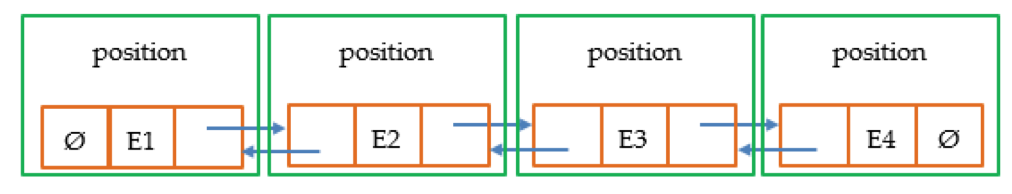

For a linked list, if we want to insert a new node or remove an existing node at an arbitrary position, we need to traverse from the head of an SLL or the head/tail of a DLL to the preceding node of the target node. Thus, the time complexity in worst case for both insertion and removal is $O(n)$.

To reduce the time complexity of these two operations, we use a positional list to identify the position of each element in a sequence.

For position `p`:

| Operation | Description |
| -- | -- |
| `p.element()` | Return the element stored in position `p`. |

For position list:

| Operation | Description |
| -- | -- |
| `myPL.size()` | Return the number of elements in the list. |
| `myPL.isEmpty()` | Return `True` if the list is empty and `False` otherwise. |
| `myPL.first()` | Return the position of the first element in `myPL`, or `None` if `myPL` is empty. |
| `myPL.last()` | Return the position of the last element in `myPL`, or None if `myPL` is empty. |
| `myPL.before(p)` | Return the position of the preceding element of position `p`, or `None` if `p` is the first position. |
| `myPL.after(p)` | Return the position of the following element of position `p`, or None if `p` is the last position. |
| `myPL.add_first(e)` | Insert a new element `e` at the head of `myPL`, and return the position of `e`. |
| `myPL.add_last(e)` | Insert a new element `e` at the tail of `myPL`, and return the position of `e`. |
| `myPL.add_before(p, e)` | Insert a new element `e` right before the position `p`, and return the position of `e`. |
| `myPL.add_after(p, e)` | Insert a new element `e` right after the position `p`, and return the position of `e`. |
| `myPL.replace(p, e)` | Replace the element at position `p` with the element `e`, and return the element formerly located at position `p`. |
| `myPL.delete(p)` | Delete and invalidate the position `p`, and return the element formerly located at position `p`. |

In [176]:
class Node: 
    
    def __init__(self, element=None, prev=None, nxt=None): 
        self.element = element 
        self.prev = prev
        self.next = nxt

    def as_str(self):
        return f"{{{self.prev and self.prev.element}«{self.element}»{self.next and self.next.element}}}"

class Position:

    def __init__(self, node):
        self.node = node
    
    def __repr__(self):
        return self.node.as_str()

    def element(self):
        return self.node

class PositionalList(DoublyLinkedList):

    def __init__(self): 
        self.head = None
        self.tail = None
        self._size = 0

    def __len__(self):
        return self.size
    
    def __iter__(self):
        cur = self.head
        
        while cur:
            yield cur
            cur = cur.next
    
    def __repr__(self):
        return "[ " + " → ".join([node.as_str() for node in self]) + f" ] (size: {self._size})"

    def first(self):
        return Position(self, self.head)
 
    def last(self):
        return Position(self, self.tail)
 
    def before(self, pos):
        if not isinstance(pos, Position) or not pos.node.prev:
            raise TypeError('Invalid position')

        return Position(pos.node.prev)
 
    def after(self, pos):
        if not isinstance(pos, Position) or not pos.node.next:
            raise TypeError('Invalid position')

        return Position(pos.node.next)
    
    def add_first(self, element):
        node = Node(element, nxt=self.head)

        if self.head:
            self.head.prev = node
        
        self.head = node
        
        if not self.tail:
            self.tail = self.head

        self._size += 1 
        return Position(node)

    def add_last(self, element):
        node = Node(element, prev=self.tail)
        
        if self.tail:
            self.tail.next = node

        self.tail = node
                
        if not self.head:
            self.head = self.tail

        self._size += 1
        return Position(node)

    def add_before(self, pos, element):
        if not isinstance(pos, Position):
            raise TypeError('Invalid position')
        
        node = Node(element, prev=pos.node.prev, nxt=pos.node)
        
        if pos.node.prev:
            pos.node.prev.next = node
        else:
            self.head = node

        pos.node.prev = node
        self._size += 1
        return Position(node)

    def add_after(self, pos, element):
        if not isinstance(pos, Position):
            raise TypeError('Invalid position')
        
        node = Node(element, prev=pos.node, nxt=pos.node.next)
        
        if pos.node.next:
            pos.node.next.prev = node
        else:
            self.tail = node
        
        pos.node.next = node
        self._size += 1
        return Position(node)

    def replace(self, pos, element):
        if not isinstance(pos, Position):
            raise TypeError('Invalid position')

        prev_element = pos.node.element 
        pos.node.element = element
        return prev_element
        
    def delete(self, pos):
        if not isinstance(pos, Position):
            raise TypeError('Invalid position')
            
        element = pos.node.element

        if self._size == 1:
            self.head = None
            self.tail = None
            
        elif pos.node == self.head:
            self.head = self.head.next
            self.head.prev = None
            
        elif pos.node == self.tail:
            self.tail = self.tail.prev
            self.tail.next = None
            
        else:
            pos.node.prev.next = pos.node.next
            pos.node.next.prev = pos.node.prev
            
        self._size -= 1
        return element

    def isEmpty(self):
        return self._size == 0
    
    def size(self):
        return self._size

ll = PositionalList() 
pos_1 = ll.add_first(1)
print("Add first 1: ", ll)
pos_2 = ll.add_last(2)
print("Add last 2: ",ll)
pos_3 = ll.add_last(3)
print("Add last 3: ",ll)
pos_4 = ll.add_after(pos_2, 4)
print("Add add 4 after 2: ",ll)
pos_6 = ll.add_before(pos_3, 6)
print("Add add 6 before 3: ",ll)
pos_7 = ll.add_before(pos_4, 7)
print("Add add 7 before 4: ",ll)
pos_8 = ll.add_before(pos_1, 8)
print("Add add 8 before 1: ",ll)
pos_9 = ll.add_after(pos_3, 9)
print("Add add 9 after 3: ",ll)
print("Delete 8: ", ll.delete(pos_8), ll)
print("Delete 9: ", ll.delete(pos_9), ll)
print("Delete 6: ", ll.delete(pos_6), ll)
print("Is empty: ", ll.isEmpty(), ll.size())
print("Replace 3 with 8", ll.replace(pos_3, 8), ll)
print("Replace 1 with 5", ll.replace(pos_1, 5), ll)
print("Delete 1", ll.delete(pos_1), ll)
print("Delete 2", ll.delete(pos_2), ll)
print("Delete 7", ll.delete(pos_7), ll)
print("Delete 4", ll.delete(pos_4), ll)
print("Delete 3", ll.delete(pos_3), ll)
print("Is empty: ", ll.isEmpty(), ll.size())


Add first 1:  [ {None«1»None} ] (size: 1)
Add last 2:  [ {None«1»2} → {1«2»None} ] (size: 2)
Add last 3:  [ {None«1»2} → {1«2»3} → {2«3»None} ] (size: 3)
Add add 4 after 2:  [ {None«1»2} → {1«2»4} → {2«4»3} → {4«3»None} ] (size: 4)
Add add 6 before 3:  [ {None«1»2} → {1«2»4} → {2«4»6} → {4«6»3} → {6«3»None} ] (size: 5)
Add add 7 before 4:  [ {None«1»2} → {1«2»7} → {2«7»4} → {7«4»6} → {4«6»3} → {6«3»None} ] (size: 6)
Add add 8 before 1:  [ {None«8»1} → {8«1»2} → {1«2»7} → {2«7»4} → {7«4»6} → {4«6»3} → {6«3»None} ] (size: 7)
Add add 9 after 3:  [ {None«8»1} → {8«1»2} → {1«2»7} → {2«7»4} → {7«4»6} → {4«6»3} → {6«3»9} → {3«9»None} ] (size: 8)
Delete 8:  8 [ {None«1»2} → {1«2»7} → {2«7»4} → {7«4»6} → {4«6»3} → {6«3»9} → {3«9»None} ] (size: 7)
Delete 9:  9 [ {None«1»2} → {1«2»7} → {2«7»4} → {7«4»6} → {4«6»3} → {6«3»None} ] (size: 6)
Delete 6:  6 [ {None«1»2} → {1«2»7} → {2«7»4} → {7«4»3} → {4«3»None} ] (size: 5)
Is empty:  False 5
Replace 3 with 8 3 [ {None«1»2} → {1«2»7} → {2«7»4} → {7«4»8}

| | Array | Singly Linked List (SLL) | Doubly-linked List (DLL) | Linked List with Position List (ADT)	|
| -- | -- | -- | -- | -- |
| **Advantages** | The access time to any element in the array is $O(1)$. | The size of an SLL grows proportionally with the number of elements. | Have the same advantages of singly linked list. | The time complexity is $O(1)$ for accessing, insertion and removal operations at an arbitrary position. |
| | The amortised time for appending an element to the array is $O(1)$. | Elements can be inserted or removed easily. | Can transverse the list in both directions. | |
| | Little memory overhead. | | Faster insertion and removal operations than SLL. | |
| **Disadvantages** | The length of the underlying array may be larger than the actual number of stored elements. | The time complexity of accessing an element at an arbitrary position is $O(n)$. | The time complexity of accessing an element at an arbitrary position is $O(n)$. | Need extra space to store n positions. |
| | The resizing operation on dynamic arrays may cause noticible delay in real-time systems. | The time complexity of insertion and removal at an arbitrary position in the worst case is $O(n)$. | Need extra space to store `2` $n$ references. |
| | Adding and removing one element in the middle of an array are expensive. | Can only traverse the list in one direction. | | |
| | | Need extra space to store $n$ references. | |



#### Time complexity

| Operation | Array | Singly Linked List (SLL) | Doubly-linked List (DLL) | Linked List with Position List (ADT) |
| -- | -- | -- | -- | -- |
| Accessing | $O(1)$ | $O(n)$ | $O(n)$ | $O(1)$ |
| Insertion | $O(1)$ ($O(n)$ worse) | $O(1)$ ($O(n)$ worse) | $O(1)$ ($O(n)$ worse) | $O(1)$ |
| Removal | $O(1)$ ($O(n)$ worse) | $O(1)$ ($O(n)$ worse) | $O(1)$ ($O(n)$ worse) | $O(1)$ |


#### Array

- **Advantages**
    - The access time to any element in the array is $O(1)$.
    - The amortised time for appending an element to the array is $O(1)$.
    - Little memory overhead.
- **Disadvantages**
    - The length of the underlying array may be larger than the actual number of stored elements.
    - The risizing operation on dynamic arrays may cause noticible delay in real-time systems.
    - Adding and removing one element in the middle of an array are expensive.

#### Singly Linked List (SLL)

- **Advantages**
    - The size of an SLL grows proportionally with the number of elements.
    - Elements can be inserted or removed easily.
- **Disadvantages**
    - The time complexity of accessing an element at an arbitrary position is $O(n)$.
    - The time complexity of insertion and removal at an arbitrary position in the worst case is $O(n)$.
    - Can only traverse the list in one direction.
    - Need extra space to store $n$ references.
   
#### Doubly-linked List (DLL)

- **Advantages**
    - Have the same advantages of singly linked list.
    - Can transverse the list in both directions.
    - Faster insertion and removal operations than SLL.
- **Disadvantages**
    - The time complexity of accessing an element at an arbitrary position is $O(n)$.
    - Need extra space to store `2` $n$ references.”

#### Linked List with Position List (ADT)	

- **Advantages**
    - The time complexity is $O(1)$ for accessing, insertion and removal operations at an arbitrary position.
- **Disadvantages**
    - Need extra space to store n positions.

If you want to build a website where fast retrieval of a sequence of records is essential, which of the following data structures is preferred?

Answer: Array-based sequences, as they are fast in accessing elements and have a time complexity of $O(1)$.

If you want to build a text editor where insertions and deletions at arbitrary positions are essential, which of the following data structures is preferred?

Answer: Positional lists, as they are fast in insertions and deletions at arbitrary positions and have a time complexity of $O(1)$. 

Choose the scenarios where DLL is preferred over SLL 
- (1) insert the tail node
- (2) remove the tail node
- (3) locate an element in the first half of the list
- (4) locate an element in the second half of the list

Answer: (2) and (4). DLL only needs $O(1)$ time to remove the tail node while SLL needs $O(n)$ time. DLL is faster than SLL in locating an element in the second half of the list by traversing from the tail node.